In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_excel('/content/output_data.xlsx', sheet_name='Sheet1')

In [ ]:
df



,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um),neff,Aeff\n(um^2),dispersion\n(ps/km.nm),conf-loss\n(dB/cm),conf-loss-in-log10\n(dB/cm)
0,1.444,1,4,0.7,0.8,1.800000,1.27828,4.96730,-587.0550,1.851780e+02,2.267589
1,1.444,1,4,0.7,0.8,1.583330,1.29633,2.49561,-685.1410,4.018090e+01,1.604020
2,1.444,1,4,0.7,0.8,1.413220,1.31463,1.68857,-576.5430,6.514520e+00,0.813882
3,1.444,1,4,0.7,0.8,1.276120,1.33194,1.33313,-396.4210,9.140750e-01,-0.039018
4,1.444,1,4,0.7,0.8,1.163270,1.34753,1.13895,-229.8200,1.239610e-01,-0.906715
...,...,...,...,...,...,...,...,...,...,...,...
1113,1.444,1,5,0.6,2.0,0.589655,1.46354,4.06947,59.7801,9.104810e-16,-15.040729
1114,1.444,1,5,0.6,2.0,0.564356,1.46406,4.04679,58.0553,5.573740e-16,-15.253853
1115,1.444,1,5,0.6,2.0,0.541139,1.46453,4.02620,56.4114,3.539720e-16,-15.451031
1116,1.444,1,5,0.6,2.0,0.519757,1.46495,4.00741,54.8488,2.322280e-16,-15.634085


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_excel('/content/output_data.xlsx', sheet_name='Sheet1')
X=df.iloc[:,:6]
Y_aeff=df.iloc[:,7:8]
Y_neff=df.iloc[:,6:7]

In [ ]:
X.head()

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um)
0,1.444,1,4,0.7,0.8,1.80000
1,1.444,1,4,0.7,0.8,1.58333
2,1.444,1,4,0.7,0.8,1.41322
3,1.444,1,4,0.7,0.8,1.27612
4,1.444,1,4,0.7,0.8,1.16327


In [ ]:
Y_aeff.head()

,Aeff\n(um^2)
0,4.96730
1,2.49561
2,1.68857
3,1.33313
4,1.13895


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_reg=LinearRegression()
x_aef_train,x_aef_validation,y_aef_train,y_aef_validation=train_test_split(X,Y_aeff,test_size=0.2)
lin_reg.fit(x_aef_train,y_aef_train)


# mse=cross_val_score(lin_reg,X,Y,scoring="r2",cv=5)
y_aef_pred=lin_reg.predict(x_aef_validation)
mse1=mean_squared_error(y_aef_validation,y_aef_pred)
print(mse1)
r2=r2_score(y_aef_validation,y_aef_pred)
print(f"r2 value of aeff {r2}")


0.08547474140992262
r2 value of aeff 0.9115866277291553


In [ ]:
print()


[ 0.35315365  0.79250141  0.84293498  0.67776041 -2.13651985]


0.10596611946473863

<ipython-input-23-8261023c876f>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_dt_train,y_dt_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Mean Squared Error for Aeff: 0.010046709481631114
R-squared for Aeff: 0.9912427197764783
Mean Absolute Error (MAE): 0.9461890477678571
Root Mean Squared Error (RMSE): 0.10023327532127799


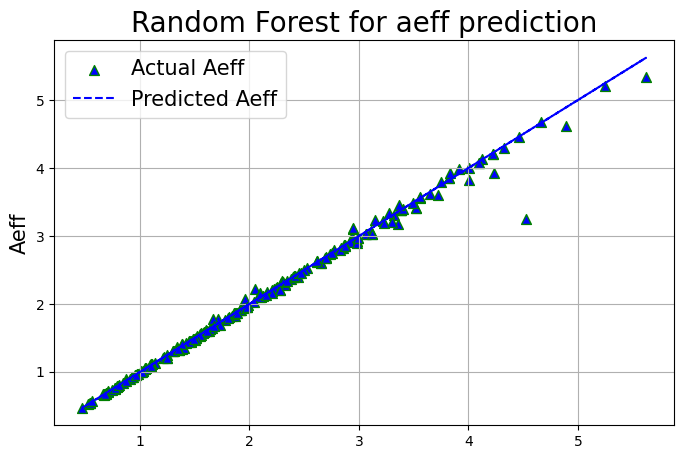

      Aeff\n(um^2)
1046       2.32235
426        1.09609
103        3.38400
387        2.16396
930        1.65551
...            ...
774        1.49275
395        1.97345
815        2.34691
614        1.34835
588        1.10231

[224 rows x 1 columns]


(224, 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

label_encoder = LabelEncoder()
x_dt_train,x_dt_test,y_dt_train,y_dt_test=train_test_split(X,Y_aeff,test_size=0.2)

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# # Fit the regressor with x and y data
regressor.fit(x_dt_train,y_dt_train)


# Making predictions on the same data or new data
predictions = regressor.predict(x_dt_test)

# Evaluating the model
mse = mean_squared_error(y_dt_test, predictions)
print(f'Mean Squared Error for Aeff: {mse}')

r2 = r2_score(y_dt_test,predictions)
print(f'R-squared for Aeff: {r2}')


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_ls_test,  predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


y_pred_dt_rescale = predictions
y_dt_test_rescale=y_dt_test
plt.figure(figsize=(8,5),facecolor="white")
plt.scatter(y_dt_test_rescale,y_pred_dt_rescale,color="green",marker="^",facecolor="blue",label="Actual Aeff",edgecolors="green",s=50)
plt.plot(y_dt_test_rescale,y_dt_test_rescale,color='blue',linestyle='--',label='Predicted Aeff')
plt.title('Random Forest for aeff prediction', fontsize=20)
plt.ylabel('Aeff',fontsize=15)
plt.legend(loc='best',fontsize=15)



<ipython-input-24-b41800120355>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_dt_train,y_dt_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Mean Squared Error for Neff: 1.547375907589304e-05
R-squared for Neff: 0.9923586565076943
Mean Absolute Error (MAE): 0.04224708482142858
Root Mean Squared Error (RMSE): 0.00393366992462421


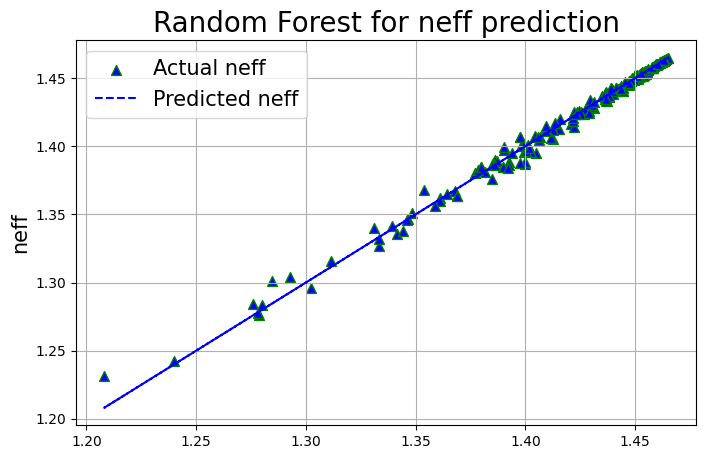

         neff
769   1.44145
167   1.39815
610   1.44128
1100  1.43742
645   1.43963
...       ...
890   1.42928
399   1.46024
910   1.43917
964   1.43686
66    1.43149

[224 rows x 1 columns]


(224, 1)

In [ ]:
x_dt_train,x_dt_test,y_dt_train,y_dt_test=train_test_split(X,Y_neff,test_size=0.2)

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# # Fit the regressor with x and y data
regressor.fit(x_dt_train,y_dt_train)


# Making predictions on the same data or new data
predictions = regressor.predict(x_dt_test)

# Evaluating the model
mse = mean_squared_error(y_dt_test, predictions)
print(f'Mean Squared Error for Neff: {mse}')

r2 = r2_score(y_dt_test,predictions)
print(f'R-squared for Neff: {r2}')
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_ls_test,  predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

y_pred_dt_rescale = predictions
y_dt_test_rescale=y_dt_test
plt.figure(figsize=(8,5),facecolor="white")
plt.scatter(y_dt_test_rescale,y_pred_dt_rescale,color="green",marker="^",facecolor="blue",label="Actual neff",edgecolors="green",s=50)
plt.plot(y_dt_test_rescale,y_dt_test_rescale,color='blue',linestyle='--',label='Predicted neff')
plt.title('Random Forest for neff prediction', fontsize=20)
plt.ylabel('neff',fontsize=15)
plt.legend(loc='best',fontsize=15)
# # plt.xlim(1.30,1.60)
# # plt.ylim(1.3,1.60)
plt.grid(True)
plt.show()
print(y_dt_test)
np.shape(y_dt_test)


Mean Squared Error (MSE): 0.12195999487125196
Mean Absolute Error (MAE): 0.20590335516575994
Root Mean Squared Error (RMSE): 0.3492277120608443
R-squared (R²): 0.8833593989491577


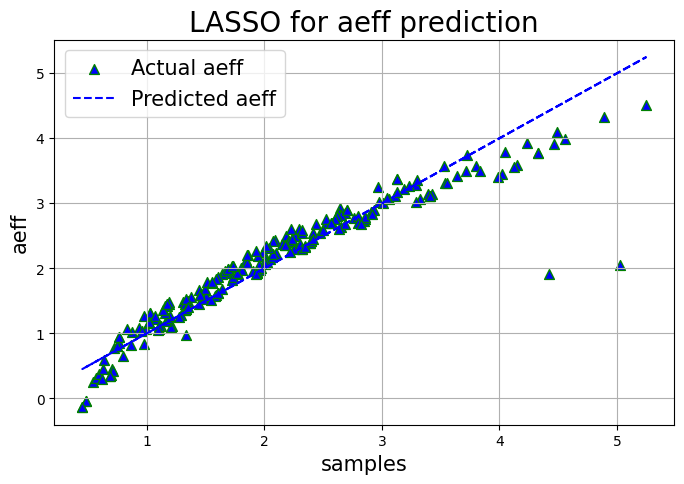

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
model = Lasso(alpha=0.001)  # alpha is the regularization parameter
x_ls_train,x_ls_test,y_ls_train,y_ls_test=train_test_split(X,Y_aeff,test_size=0.2)
# Fitting Random Forest Regression to the dataset

# Train the model on the data
model.fit(x_ls_train, y_ls_train)

# Make predictions on new data (replace with your actual data)

y_predicted = model.predict(x_ls_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_ls_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_ls_test,  y_predicted)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²)
r2 = model.score(x_ls_test, y_ls_test)
print(f"R-squared (R²): {r2}")

plt.figure(figsize=(8, 5), facecolor="white")
plt.scatter(y_ls_test, y_predicted, color="green", marker="^", facecolor="blue", label="Actual aeff", edgecolors="green", s=50)
plt.plot(y_ls_test, y_ls_test, color='blue', linestyle='--', label='Predicted aeff')
plt.title('LASSO for aeff prediction', fontsize=20)
plt.xlabel('samples', fontsize=15)
plt.ylabel('aeff', fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.grid(True)
plt.show()


Mean Squared Error (MSE): 0.0003074491199981547
Mean Absolute Error (MAE): 0.012496367267662017
Root Mean Squared Error (RMSE): 0.017534227100107797
R-squared (R²): 0.8261507134679578
Mean Squared Error: 0.0003074491199981547
R-squared: 0.8261507134679578


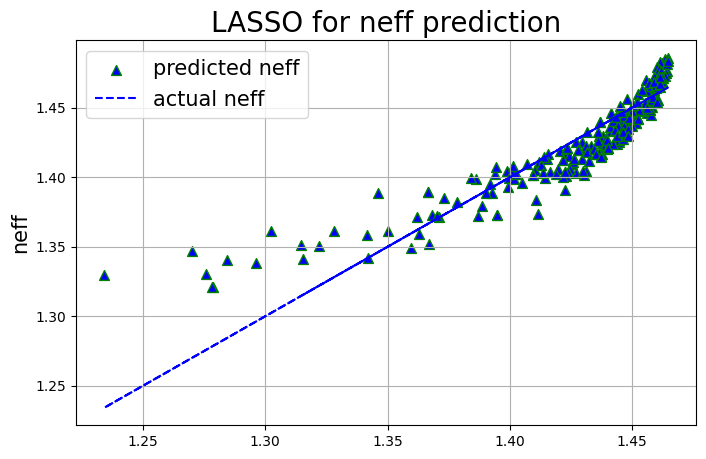

         neff
650   1.45304
540   1.43034
183   1.37837
434   1.43498
833   1.46006
...       ...
986   1.40479
1027  1.44015
1110  1.46147
508   1.45221
180   1.31558

[224 rows x 1 columns]


(224, 1)

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.001)  # alpha is the regularization parameter
x_ls_train,x_ls_test,y_ls_train,y_ls_test=train_test_split(X,Y_neff,test_size=0.2)
# Fitting Random Forest Regression to the dataset

# Train the model on the data
model.fit(x_ls_train, y_ls_train)

# Make predictions on new data (replace with your actual data)

y_predicted = model.predict(x_ls_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_ls_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_ls_test,  y_predicted)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²)
r2 = model.score(x_ls_test, y_ls_test)
print(f"R-squared (R²): {r2}")
mse_lasso = mean_squared_error(y_ls_test, y_predicted)
print(f'Mean Squared Error: {mse_lasso}')

r2_lasso = r2_score(y_ls_test, y_predicted)
print(f'R-squared: {r2_lasso}')



y_pred_dt_rescale=y_predicted
y_dt_test_rescale=y_ls_test
plt.figure(figsize=(8,5),facecolor="white")
plt.scatter(y_dt_test_rescale,y_pred_dt_rescale,color="green",marker="^",facecolor="blue",label="predicted neff",edgecolors="green",s=50)
plt.plot(y_dt_test_rescale,y_dt_test_rescale,color='blue',linestyle='--',label='actual neff')
plt.title('LASSO for neff prediction', fontsize=20)
plt.ylabel('neff',fontsize=15)
plt.legend(loc='best',fontsize=15)
# # plt.xlim(1.30,1.60)
# # plt.ylim(1.3,1.60)
plt.grid(True)
plt.show()
print(y_ls_test)
np.shape(y_ls_test)